In [2]:
import pandas as pd
import numpy as np

In [3]:
class MyLinearRegression:
    
    def __init__(self):
        self.m=0
        self.c=0

    def fit(self,x_train,y_train):
        num=0
        deno=0

        for i in range(x_train.shape[0]):
            num=num+ ((x_train[i]-x_train.mean())*(y_train[i]-y_train.mean()))
            deno=deno+((x_train[i]-x_train.mean())**2)

        self.m=num/deno
        self.c=y_train.mean()-self.m*x_train.mean()
        # return x_train.shape

    def predict(self,x_test):
        y_pred=[]
        for i in range(x_test.shape[0]):
            y_pred.append(self.m*x_test[i]+self.c)
    #    return [self.m*x_test+self.c]
        return np.array(y_pred)
       

In [4]:
df=pd.read_csv('placement.csv')
df.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
x=df.iloc[:,0]
y=df.iloc[:,1]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
lr=MyLinearRegression()

In [8]:
y_train

79     3.00
197    3.24
38     4.36
24     2.71
122    2.01
       ... 
106    2.19
14     3.42
92     4.00
179    3.03
102    1.37
Name: package, Length: 160, dtype: float64

In [9]:
lr.fit(x_train.values,y_train.values)

In [16]:
y_pred=lr.predict(x_test.values)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [12]:
model.fit(x_train.values.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model.predict(x_test.values.reshape(-1,1))

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [14]:
import matplotlib.pyplot as plt

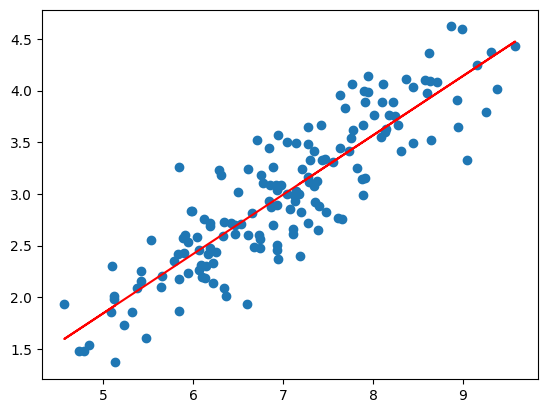

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train.values),'r')

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [29]:
print("Mean abs error : ",mean_absolute_error(y_test,y_pred))
print("Mean sq error : ",mean_squared_error(y_test,y_pred))
print("Root mean sq error : ",mean_squared_error(y_test,y_pred)**0.5)
print("R2 Score : ",r2_score(y_test,y_pred))

Mean abs error :  0.23150985393278373
Mean sq error :  0.08417638361329656
Root mean sq error :  0.2901316659954521
R2 Score :  0.7730984312051673


In [41]:
#adjusted r2 score
r2=r2_score(y_test,y_pred)
adj_r2=1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-1-1)
print("Adjusted R2 Score : ",adj_r2)

Adjusted R2 Score :  0.7671273372895138
